<a href="https://www.kaggle.com/code/duyguatasever/kaggle-survey-turkey-vs-world?scriptVersionId=110678844" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
How popular is Kaggle in Turkey?
</div>

<a><img src="https://i.ibb.co/PWvpT9F/header.png" alt="header" border="0" width=10000 height=200></a>

* In this notebook, I aim to investigate the participation of Turkish kaggles using the 2022 kaggle survey dataset. I will also use datasets from previous years to see changes between years.


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import datetime as dt
import gc
from typing import Tuple

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"

PAL = ['#336b87', '#b4b4b4','#dd4124','#009473','#F1C40F','#DFFF00','#40E0D0','#6495ED','#FF0000','#00FF00','#0000FF','#FF00FF','#800080']

import warnings
warnings.filterwarnings("ignore")

In [2]:
### Helper function
def count_then_return_percent(dataframe,column_name):
    '''
    A helper function to return value counts as percentages.
    '''
    counts = dataframe[column_name].value_counts(dropna=False)
    percentages = round(counts*100/(dataframe[column_name].count()),1)
    return percentages


def setup_plot(w=1,h=1,rows=1,cols=1,X_label='',y_label='',dpi=600):
    '''
    w: width of the figsize parameter of matplotlib.pyplot
    h: height of the figsize parameter of matplotlib.pyplot
    rows: numbers of rows in gridspec
    cols: numbers of cols in gridspec
    X_label: Label of the x-axis
    y_label: Label of the y-axis
    dpi: to set dpi for the figure.dpi
    Return axes (only single axes for now, still working on the multiple axes)
    
    design by @ankitkalauni
    '''
    #setting plot theme
    plt.rcParams['figure.dpi'] = dpi

    fig = plt.figure(figsize=(w,h), facecolor='#f6f5f5')
    gs = fig.add_gridspec(rows, cols)
    gs.update(wspace=1.5, hspace=0.05)

    background_color = "#f6f5f5"
    sns.set_palette(PAL)
    
    #making single ax
    ax_dict = {}
    for row in range(rows):
        for col in range(cols):
            ax_dict["ax%s%s" %(row,col)] = fig.add_subplot(gs[row, col])

    locals().update(ax_dict)

    #setting theme for every ax in local()
    for row in range(rows):
        for col in range(cols):
                    
            for s in ["right", "top"]:
                locals()['ax' + str(row) + str(col)].spines[s].set_visible(False)
                
            locals()['ax' + str(row) + str(col)].set_facecolor(background_color)

            locals()['ax' + str(row) + str(col)].set_facecolor(background_color)
            locals()['ax' + str(row) + str(col)].set_xlabel(X_label,fontsize=3, weight='bold',)
            locals()['ax' + str(row) + str(col)].set_ylabel(y_label,fontsize=3, weight='bold')

            locals()['ax' + str(row) + str(col)].tick_params(labelsize=3, width=0.5, length=1.5)
            locals()['ax' + str(row) + str(col)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
            locals()['ax' + str(row) + str(col)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

    return locals()['ax' + str(row) + str(col)]


def return_percentage(data,question_part):
    """Calculates percent of each value in a given column"""
    total = data[question_part].count()
    counts_df= data[question_part].value_counts().to_frame()
    percentage_df = (counts_df*100)/total
    return percentage_df


def count_then_return_percent_for_multiple_column_questions(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question):
    '''
    A helper function to convert counts to percentages.
    '''
    df = dataframe
    subset = list_of_columns_for_a_single_question
    df = df[subset]
    df = df.dropna(how='all')
    total_count = len(df) 
    dictionary = dictionary_of_counts_for_a_single_question
    for i in dictionary:
        dictionary[i] = round(float(dictionary[i]*100/total_count),1)
    return dictionary 

def sort_dictionary_by_percent(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question): 
    ''' 
    A helper function that can be used to sort a dictionary.   
    It is an adaptation of a similar function
    from https://www.kaggle.com/sonmou/what-topics-from-where-to-learn-data-science.
    '''
    dictionary = count_then_return_percent_for_multiple_column_questions(dataframe,
                                                                list_of_columns_for_a_single_question,
                                                                dictionary_of_counts_for_a_single_question)
    dictionary = {v:k    for(k,v) in dictionary.items()}
    list_tuples = sorted(dictionary.items(), reverse=False) 
    dictionary = {v:k for (k,v) in list_tuples}   
    return dictionary


def return_percentage(data,question_part):
    """Calculates percent of each value in a given column"""
    total = data[question_part].count()
    counts_df= data[question_part].value_counts().to_frame()
    percentage_df = (counts_df*100)/total
    return percentage_df


def plotly_bar_chart(response_counts,title,y_axis_title,orientation):
    '''
    This function creates a bar chart.
    '''
    response_counts_series = pd.Series(response_counts)
    pd.DataFrame(response_counts_series)
    fig = px.bar(response_counts_series,
             labels={"index": '',"value": y_axis_title},
             text=response_counts_series.values,
             orientation=orientation,)
    fig.update_layout(showlegend=False,
                      title={'text': title+' in 2021',
                             'y':0.95,
                             'x':0.5,})
    fig.show()
    

    
def plotly_hBar(df, q, title, height=400):   
    fig = px.histogram(df, 
                       y=q,
                       orientation='h',
                       width=700,
                       height=height,
                       histnorm='percent',
                       color='region',
                       color_discrete_map={
                           "Turkey": "gold", "World": "salmon"
                       },
                       opacity=0.6
                       )

    fig.update_layout(title=title, 
                      font_family="San Serif",
                      bargap=0.2,
                      barmode='group',
                      titlefont={'size': 28},
                      paper_bgcolor='#E6E6E6',
                      plot_bgcolor='#E6E6E6',                      
                      legend=dict(
                      orientation="v", 
                          y=1, 
                          yanchor="top", 
                          x=1.250, 
                          xanchor="right",)                 
                      ).update_yaxes(categoryorder='total ascending')
    #fig.update_traces(marker_color='salmon')
    fig.update_layout(yaxis_title=None,
    autosize=False,
    margin=dict(
        l=250,
        r=50,
        b=50,
        t=100,
    ),
    )
    fig.update_xaxes(showgrid=True)
    fig.update_yaxes(showgrid=False)
    fig.show()   


def plotly_vBar(df, q, title):   
    fig = px.histogram(df,
                       x=q,
                       orientation='v',
                       width=700,
                       height=450,
                       histnorm='percent',
                       color='region',
                       color_discrete_map={
                           "Turkey": "gold", "World": "salmon"
                       },
                       opacity=0.6
                       )

    fig.update_layout(title=title, 
                      font_family="San Serif",
                      bargap=0.2,
                      barmode='group',
                      titlefont={'size': 28},
                      paper_bgcolor='#E6E6E6',
                      plot_bgcolor='#E6E6E6',
                      legend=dict(
                      orientation="v", 
                          y=1, 
                          yanchor="top", 
                          x=1.250, 
                          xanchor="right",)                 
                      ).update_xaxes(categoryorder='total descending')
    #fig.update_traces(marker_color=['seagreen', 'red'])
    fig.update_layout(xaxis_title=None,
    autosize=False,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
    ),
    )
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=True)
    fig.show()
    
    
def df_with_percentages(df, q, n, region):
    
    dff = head_count(df, q, n)
    perc = []

    for item  in dff.Value:          
        
        perc.append(np.round(item/len(df)*100, 2))

    data = pd.DataFrame()
    data['Percentage'] = perc
    df_perc = pd.concat([dff, data], axis=1)
    df_perc['Region'] = region
    
    return df_perc
    
    
def annotated_heatmap(df_w, df_a, title, width=850):
    x =list(df_w['Category'])

    y = ['World', 'Turkey']

    z= [list(df_w['Percentage']),list(df_a['Percentage'])]

    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z, colorscale='orrd')

    fig.update_layout(title_text=title,
                      title_x=0.5,
                      titlefont={'size': 24, 'family':'San Serif'},
                      width=width, height=350,
                      xaxis_showgrid=False,
                      xaxis={'side': 'bottom'},
                      yaxis_showgrid=False,
                      yaxis_autorange='reversed',                   
                      paper_bgcolor='#E6E6E6',
                      )
    fig.show()
    
def head_count(df, question_num, parts):
    questions = []
    questions = ['Q'+ str(question_num) +'_'+ str(j) for j in range(1, parts)]
    
    categories = []
    values = []
    for i in questions:
        category = df[i].value_counts().index[0]
        val = df[i].value_counts()[0]
        
        categories.append(category)
        values.append(val)
       
    combined_df = pd.DataFrame()
    combined_df['Category'] = categories
    combined_df['Value'] = values
    
    combined_df = combined_df.sort_values(['Value'],ascending=False)
    
    return combined_df    
    
def age_buckets(x):
    if x<18:
        return 'other'
    elif x<22:
        return '18-21'
    elif x < 25:
        return '22-24' 
    elif x < 30: 
        return '25-29' 
    elif x < 35: 
        return '30-34' 
    elif x < 40: 
        return '35-39' 
    elif x < 45: 
        return '40-44' 
    elif x <50: 
        return '45-49' 
    elif x < 55:
        return '50-54'
    elif x < 60:
        return '55-59'
    elif x < 70:
        return '60-69'
    else: 
        return 'other'

In [3]:
df17= pd.read_csv("/kaggle/input/kaggle-survey-2017/multipleChoiceResponses.csv", encoding="ISO-8859-1")
df18= pd.read_csv("/kaggle/input/kaggle-survey-2018/multipleChoiceResponses.csv", )
df19= pd.read_csv("/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv", )
df20= pd.read_csv("/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv", )
df21= pd.read_csv("/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv", )
df22= pd.read_csv("/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv", )

df17 = df17[1:].reset_index(drop=True)
df18 = df18[1:].reset_index(drop=True)
df19 = df19[1:].reset_index(drop=True)
df20 = df20[1:].reset_index(drop=True)
df21 = df21[1:].reset_index(drop=True)
df22 = df22[1:].reset_index(drop=True)

df17['Age_Group'] = df17.Age.apply(age_buckets)
df17["GenderSelect"] = df17["GenderSelect"].apply(lambda x : 'Etc.' if x not in ['Male', 'Female'] else x)
df18["Q1"] = df18["Q1"].apply(lambda x : 'Etc.' if x not in ['Male', 'Female'] else x)
df19["Q2"] = df19["Q2"].apply(lambda x : 'Etc.' if x not in ['Male', 'Female'] else x)
df20["Q2"] = df20["Q2"].apply(lambda x : 'Etc.' if x not in ['Man', 'Woman'] else x)
df21["Q2"] = df21["Q2"].apply(lambda x : 'Etc.' if x not in ['Man', 'Woman'] else x)
df22["Q3"] = df22["Q3"].apply(lambda x : 'Etc.' if x not in ['Man', 'Woman'] else x)

In [4]:
df17_TR = df17[df17["Country"]=="Turkey"]
df18_TR = df18[df18["Q3"]=="Turkey"]
df19_TR = df19[df19["Q3"]=="Turkey"]
df20_TR = df20[df20["Q3"]=="Turkey"]
df21_TR = df21[df21["Q3"]=="Turkey"]
df22_TR = df22[df22["Q4"]=="Turkey"]


df20_TR["Q2"] = df20_TR["Q2"].map({"Man":"Male", "Woman":"Female", "Etc.":"Etc."})
df20["Q2"] = df20["Q2"].map({"Man":"Male", "Woman":"Female", "Etc.":"Etc."})

df21_TR["Q2"] = df21_TR["Q2"].map({"Man":"Male", "Woman":"Female", "Etc.":"Etc."})
df21["Q2"] = df21["Q2"].map({"Man":"Male", "Woman":"Female", "Etc.":"Etc."})

df22_TR["Q3"] = df22_TR["Q3"].map({"Man":"Male", "Woman":"Female", "Etc.":"Etc."})
df22["Q3"] = df22["Q3"].map({"Man":"Male", "Woman":"Female", "Etc.":"Etc."})

In [5]:
#2021
q7_list_of_columns_2021 = ['Q7_Part_1',
                      'Q7_Part_2',
                      'Q7_Part_3',
                      'Q7_Part_4',
                      'Q7_Part_5',
                      'Q7_Part_6',
                      'Q7_Part_7',
                      'Q7_Part_8',
                      'Q7_Part_9',
                      'Q7_Part_10',
                      'Q7_Part_11',
                      'Q7_Part_12',
                      'Q7_OTHER']

df = df21_TR.rename(columns={'Q1':'age',
                        'Q2':'gender',
                        'Q3':'country',
                        'Q4': 'education_level',
                        'Q5': 'occupation',
                        'Q25': 'salary',
                        'Q6':'programming_experience',
                        'Q15': 'ml_experience',
                        "Q7_Part_1": "Python",
                        "Q7_Part_2": "R",
                        "Q7_Part_3": "SQL",
                        "Q7_Part_4": "C",
                        "Q7_Part_5": "C++",
                        "Q7_Part_6": "Java",
                        "Q7_Part_7": "Javascript",
                        "Q7_Part_8": "Julia",
                        "Q7_Part_9": "Swift",
                        "Q7_Part_10": "Bash",
                        "Q7_Part_11": "MATLAB",
                        "Q7_Part_12": "None",
                        "Q7_OTHER": "Other"})


q7_dictionary_of_counts_2021 = {
    'Python' : (df21_TR['Q7_Part_1'].count()),
    'R': (df21_TR['Q7_Part_2'].count()),
    'SQL' : (df21_TR['Q7_Part_3'].count()),
    'C' : (df21_TR['Q7_Part_4'].count()),
    'C++' : (df21_TR['Q7_Part_5'].count()),
    'Java' : (df21_TR['Q7_Part_6'].count()),
    'Javascript' : (df21_TR['Q7_Part_7'].count()),
    'Julia' : (df21_TR['Q7_Part_8'].count()),
    'Swift' : (df21_TR['Q7_Part_9'].count()),
    'Bash' : (df21_TR['Q7_Part_10'].count()),
    'MATLAB' : (df21_TR['Q7_Part_11'].count()),
    'None' : (df21_TR['Q7_Part_12'].count()),
    'Other' : (df21_TR['Q7_OTHER'].count())
}


# 2022

q12_list_of_columns_2022 = ['Q12_1',
                            'Q12_2',
                            'Q12_3',
                            'Q12_4',
                            'Q12_5',
                            'Q12_6',
                            'Q12_7',
                            'Q12_8',
                            'Q12_9',
                            'Q12_10',
                            'Q12_11',
                            'Q12_12',
                            'Q12_13',
                            'Q12_14',
                            'Q12_15']

df = df22_TR.rename(columns={'Q2':'age',
                             'Q3':'gender',
                             'Q4':'country',
                             'Q8': 'education_level',
                             'Q23': 'occupation',
                             'Q29': 'salary',
                             'Q11':'programming_experience',
                             'Q16': 'ml_experience',
                             "Q12_1": "Python",
                             "Q12_2": "R",
                             "Q12_3": "SQL",
                             "Q12_4": "C",
                             "Q12_5": "C++",
                             "Q12_6": "Java",
                             "Q12_7": "Javascript",
                             "Q12_8": "Julia",
                             "Q12_9": "Bash",
                             "Q12_10": "MATLAB",
                             "Q12_11": "None",
                             "Q12_12": "Other",
                             "Q12_13": "C#",
                             "Q12_14": "PHP",
                             "Q12_15": "Go"})


q12_dictionary_of_counts_2022 = {
    'Python' : (df22_TR['Q12_1'].count()),
    'R': (df22_TR['Q12_2'].count()),
    'SQL' : (df22_TR['Q12_3'].count()),
    'C' : (df22_TR['Q12_4'].count()),
    'C++' : (df22_TR['Q12_5'].count()),
    'Java' : (df22_TR['Q12_6'].count()),
    'Javascript' : (df22_TR['Q12_7'].count()),
    'Julia' : (df22_TR['Q12_8'].count()),
    'Bash' : (df22_TR['Q12_9'].count()),
    'MATLAB' : (df22_TR['Q12_10'].count()),
    'None' : (df22_TR['Q12_11'].count()),
    'Other' : (df22_TR['Q12_12'].count()),
    'C#' : (df22_TR['Q12_13'].count()),
    'PHP' : (df22_TR['Q12_14'].count()),
    'Go' : (df22_TR['Q12_15'].count())}

#2022
turkey = ['Turkey']
df22['region']=["Turkey" if x in turkey else "World" for x in df22['Q4']]

df22_turkey = df22[df22['Q4'].isin(turkey)]
df22_world = df22[~df22['Q4'].isin(turkey )]

turkey22 = len(df22_TR)
row22 = len(df22) - turkey22

#2021
turkey = ['Turkey']
df21['region']=["Turkey" if x in turkey else "World" for x in df21['Q3']]

df21_turkey = df21[df21['Q3'].isin(turkey)]
df21_world = df21[~df21['Q3'].isin(turkey )]

turkey21 = len(df21_TR)
row21 = len(df21) - turkey21

#2020
turkey20 = len(df20_TR)
row20 = len(df20) - turkey20

#2019
turkey19 = len(df19_TR)
row19 = len(df19) - turkey19

#2018
turkey18 = len(df18_TR)
row18 = len(df18) - turkey18

#2017
turkey17 = len(df17_TR)
row17 = len(df17) - turkey17

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
TURKEY
 </div>   
 
# How popular is Kaggle in Turkey?

* In the 2022 kaggle survey, only 1.4% of the respondents are from Turkey.

* This year's (2022) survey has seen the Turkish participants increase by a whopping 41.74% compared to the inaugural survey in 2017.


In [6]:
region = ['Turkey', 'Rest of the World']
value = [turkey22, row22]
percent =[turkey22/(turkey22 +row22)*100, row22/(turkey22+row22)*100]

fig = go.Figure(data=[go.Bar(
            x=value, y=region,
            text=np.round(percent,1),
            textposition='inside',
            textfont=dict(
                            family="sans serif",
                            size=18,
                            color="black"),
            orientation='h',
            marker_color=['gold', 'salmon'],
            opacity=0.6,
                    )])
fig.update_layout(title='<b>Number of respondents: Turkey vs Rest of the world (2022)<b>', 
                  font_family="San Serif",
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 24},
                  paper_bgcolor='#E6E6E6',
                  plot_bgcolor='#E6E6E6',                  
              
                  )
fig.update_layout(#yaxis_title=None,
    autosize=False,
    margin=dict(
        l=150,
        r=50,
        b=50,
        t=100,
    ),
    )

fig.show()

In [7]:
year = ['2017', '2018', '2019', '2020', '2021', "2022"]
value = [turkey17, turkey18, turkey19, turkey20, turkey21, turkey22]

color = ['salmon','salmon','salmon','salmon', 'salmon', 'gold']

fig = go.Figure(data=[go.Bar(
            y=value, x=year,
            text=value,
            textposition='outside',
            textfont=dict(
                            family="sans serif",
                            size=18,
                            color="black"),
            orientation='v',
            marker_color= color, 
            opacity=0.6
                    )])

fig.update_layout(title='<b>The Rise of Turkey Kagglers<b>', 
                  font_family="San Serif",
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 28},
                  paper_bgcolor='#E6E6E6',
                  plot_bgcolor='#E6E6E6',                              
                  )
fig.update_layout(yaxis_title='Number of Respondents',xaxis_title='Year',
    autosize=False,
    margin=dict(
        l=150,
        r=50,
        b=50,
        t=70,
    ),
    )

fig.show()

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Gender
    
 </div>  
 
# What is your gender? (Turkey)


* General trend is the men dominate the survey. However, when the last 3 years are examined, it is seen that the rates have progressed close to each other.

* The participation of Turkish women has been since 2019 with increase. In the 2022 survey, that figure are 23.5%.

In [8]:
colors2 = ['dodgerblue', 'plum', '#F0A30A','#8c564b'] 

gender_count_2019 = df19_TR['Q2'].value_counts(sort=True)
gender_count_2020 = df20_TR['Q2'].value_counts(sort=True)
gender_count_2021 = df21_TR['Q2'].value_counts(sort=True)
gender_count_2022 = df22_TR['Q3'].value_counts(sort=True)


labels = ["Male ", "Female","Etc"]
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{'type':'domain'},    {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]])


fig.add_trace(go.Pie(labels=labels, values=gender_count_2019.values, name="2019",marker=dict(colors=colors2)),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=gender_count_2020.values, name="2020",marker=dict(colors=colors2)),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=gender_count_2021.values, name="2021",marker=dict(colors=colors2)),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values=gender_count_2022.values, name="2022",marker=dict(colors=colors2)),
              2, 2)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 1
fig.data[1].marker.line.color = "black"
fig.data[2].marker.line.width = 1
fig.data[2].marker.line.color = "black"
fig.data[3].marker.line.width = 1
fig.data[3].marker.line.color = "black"

fig.update_layout(
    title_text="Gender Distribution over the Years in Turkey",font=dict(size=12), legend=dict(orientation="h"),
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2019', x=0.20, y=1.1, font_size=20, showarrow=False),
                 dict(text='2020', x=0.80, y=1.1, font_size=20, showarrow=False),
                 dict(text='2021', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='2022', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [9]:
df22_trwomen = df22_TR[df22_TR['Q3'] == 'Female']
df21_trwomen = df21_TR[df21_TR['Q2'] == 'Female']
df20_trwomen = df20_TR[df20_TR['Q2'] == 'Female']
df19_trwomen = df19_TR[df19_TR['Q2'] == 'Female']
df18_trwomen = df18_TR[df18_TR['Q1'] == 'Female']
df17_trwomen = df17_TR[df17_TR['GenderSelect'] == 'Female']

trwomen22 = len(df22_trwomen)
trwomen21 = len(df21_trwomen)
trwomen20 = len(df20_trwomen)
trwomen19 = len(df19_trwomen)
trwomen18 = len(df18_trwomen)
trwomen17 = len(df17_trwomen)

    
year = ['2017', '2018', '2019', '2020', '2021', '2022']
value = [trwomen17, trwomen18, trwomen19, trwomen20, trwomen21, trwomen22]

percent =[
    trwomen17/len(df17_TR)*100,
    trwomen18/len(df18_TR)*100,
    trwomen19/len(df19_TR)*100,
    trwomen20/len(df20_TR)*100,
    trwomen21/len(df21_TR)*100,
    trwomen22/len(df22_TR)*100
    ]  

color = 6* ['#fa8072'] 
color[5] = 'gold'
fig = go.Figure(data=[go.Bar(
            y=value, x=year,
            text=np.round(percent, 1), 
            textposition='outside',
            texttemplate = ["<b style='color: #f'>%{text}%</b>"]*6,
            textfont=dict(  family="sans serif",
                            size=16,
                            color="black"),
            orientation='v',
            marker_color= color, 
            opacity=0.6
                    )])
fig.update_layout(title='<b>Turkish women kagglers (2017-2022)<b>', 
                  font_family="San Serif",
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 28},
                  template='simple_white',
                  paper_bgcolor='#E6E6E6',
                  plot_bgcolor='#E6E6E6',                  
                  )
fig.update_layout(yaxis_title='Number of Respondents',xaxis_title='Year',
    autosize=False,
    margin=dict(
        l=100,
        r=50,
        b=50,
        t=50,
        ),
    )

annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=0.01, y=0.97,
                        text='<b>  <b>',
                             font=dict(family='Arial', size=12, color='#cc5500'),
                        showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=0.01, y=.93,
                        text="<b> <b> ",
                             font=dict(family='Arial', size=12, color='#cc5500'),
                        showarrow=False))

fig.update_layout(annotations=annotations)
fig.show()

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Age
</div>    
        
# What is your age? (Turkey)

* Generally both groups (woman & man) of participants are dominated by younger kagglers. In 2021, Turkey's 54.7% of the are made up of kaggle who are 30 or under. In the inuagural survey year (2017), that figure was 55.3%.

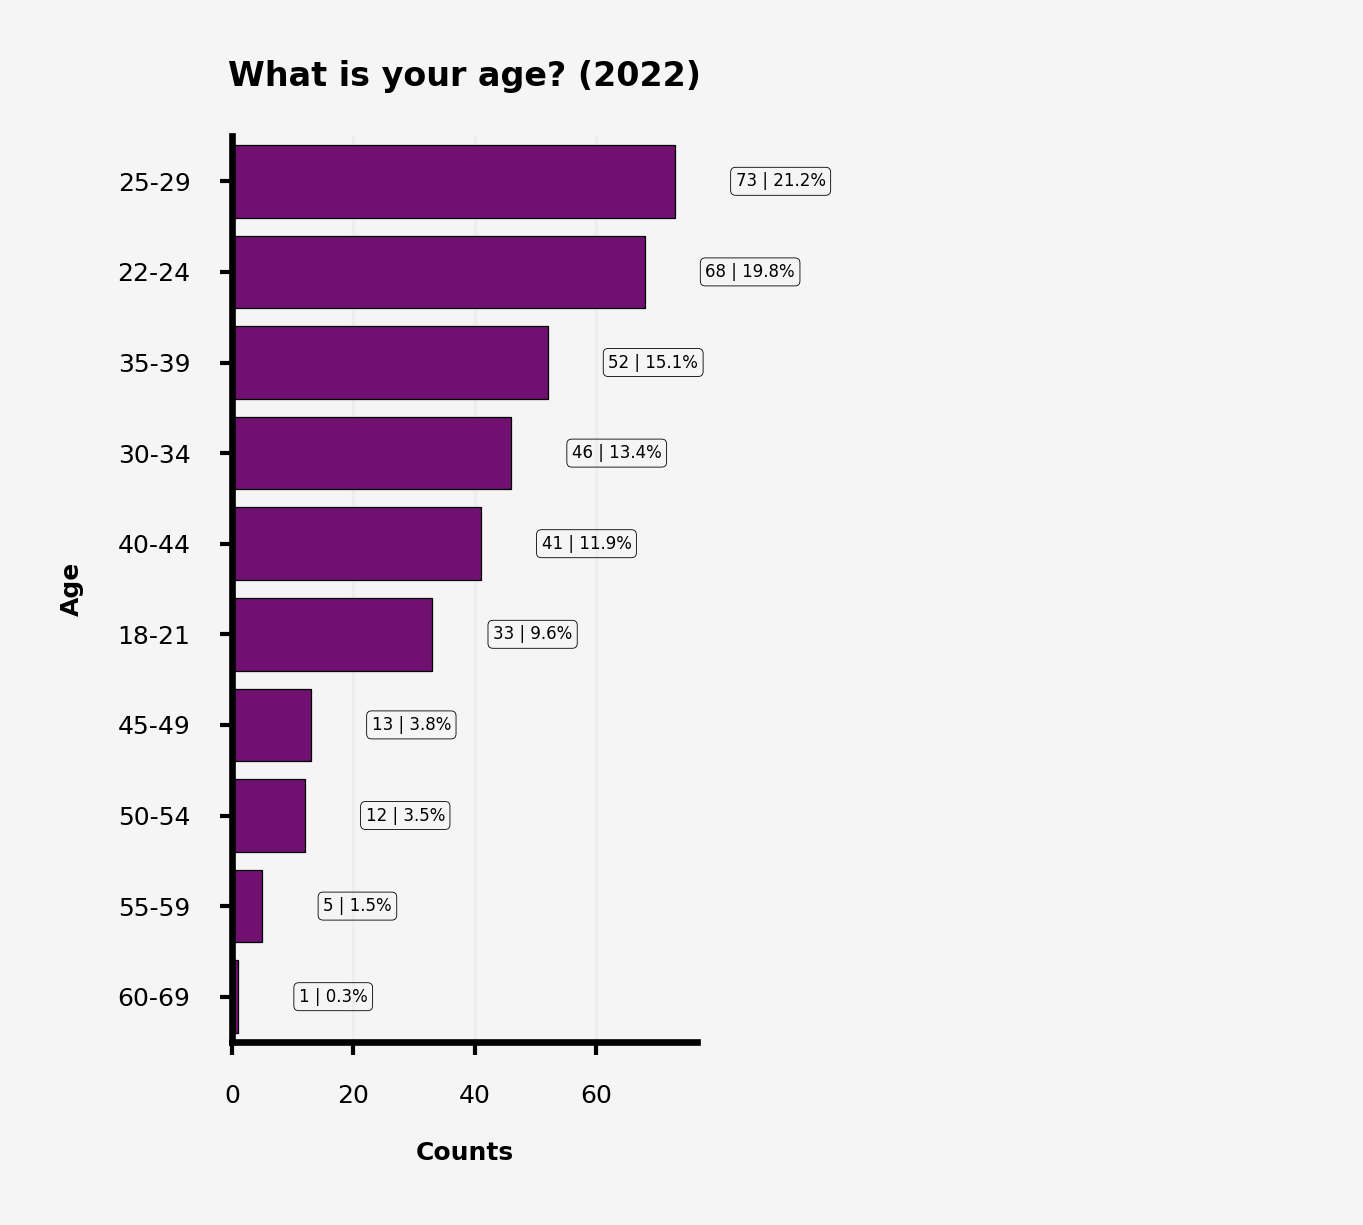

In [10]:
_q = 'What is your age? (2022)'
age = df22_TR.iloc[1:,1]

_x = age.value_counts().values
_y = age.value_counts().index

q1 = sns.barplot(y =_y,x=_x ,ax=setup_plot(w=1,h=2,X_label='Counts',y_label='Age'),zorder=2,linewidth=0.15,color=PAL[-1],ec='black')
plt.title(_q,fontsize=4, weight='bold')

xmin, xmax = q1.get_xlim()
ymin, ymax = q1.get_ylim()


plt.text(xmax+100, ymax,'Age Plot',fontsize=3,ha='right',alpha=.001) #ignore this line
for p in q1.patches:
            value = f'{p.get_width():.0f} | {(p.get_width()/age.shape[0]):,.1%}'
            if value == '0':
                pass
            else:
                x = p.get_x() + p.get_width() + 10
                y = p.get_y() + p.get_height() / 2 
                q1.text(x, y, value, ha='left', va='center', fontsize=2, 
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.10))
plt.show()

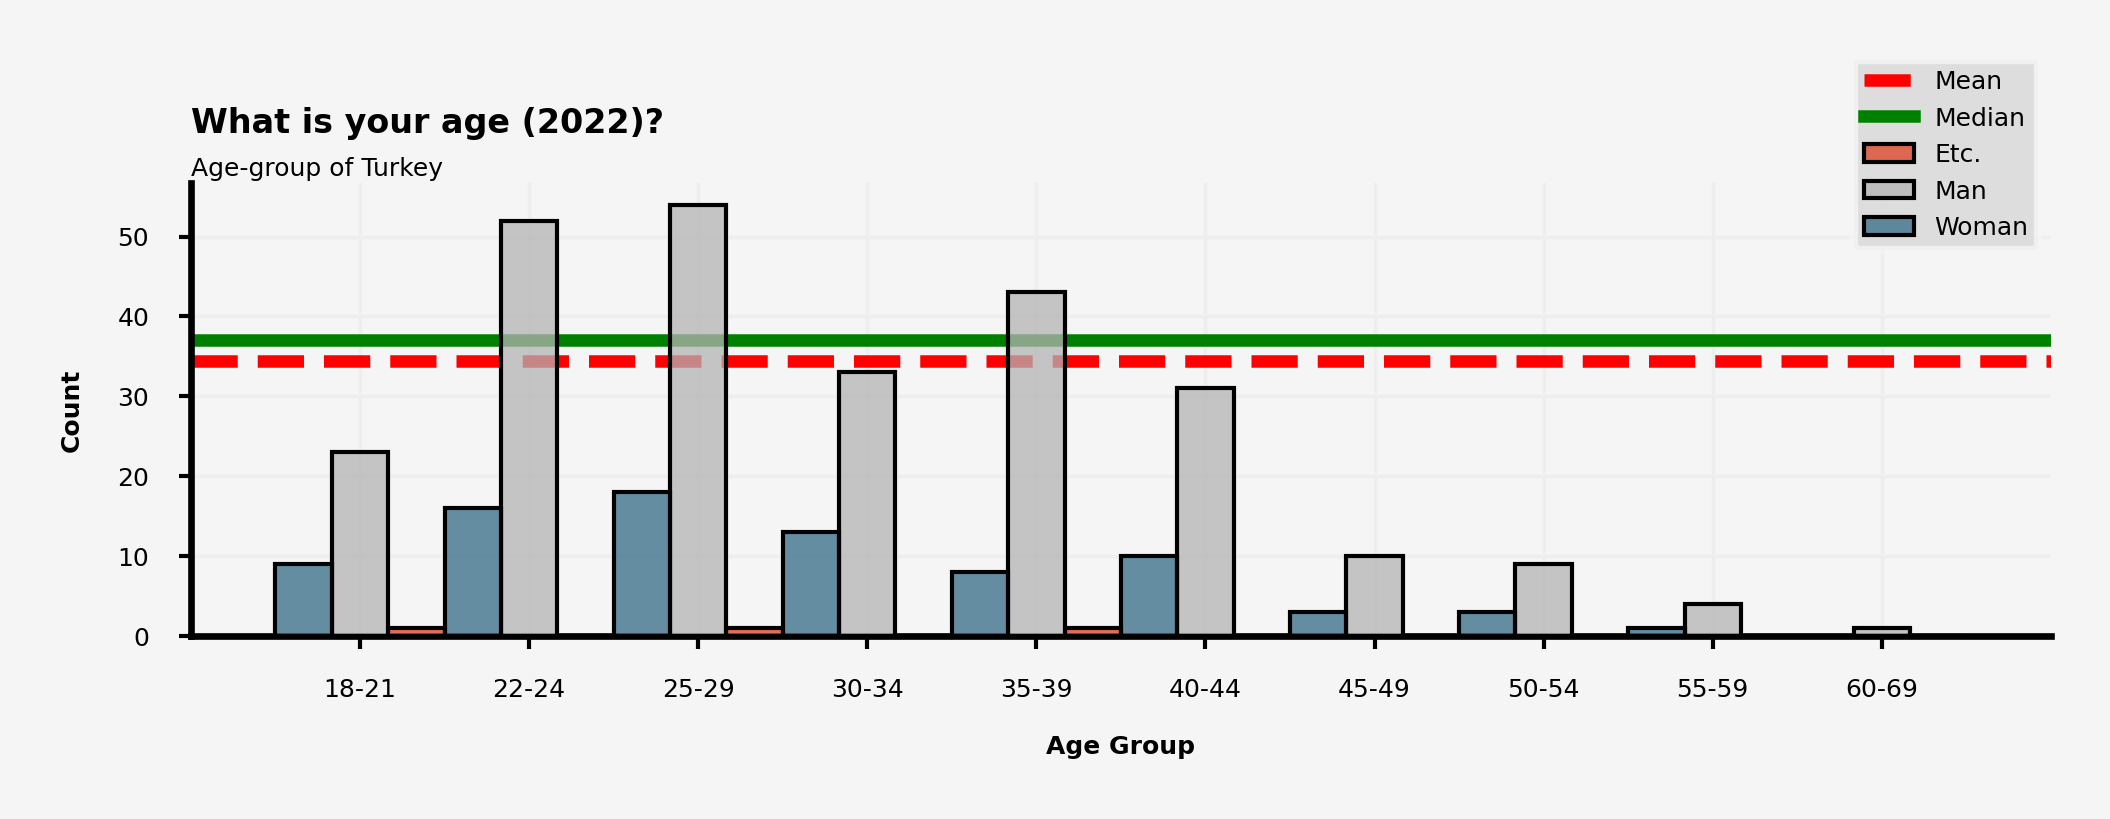

In [11]:
#q1 2022
_df = df22_TR.iloc[1:,1]
gender = df22_TR.iloc[1:,2]
_df = pd.concat([_df,gender],axis=1)

_df['sort'] = _df['Q2'].str.extract('(^[0-9]{2})', expand=False).astype(int)
_df.sort_values('sort',inplace=True, ascending=True)
_df = _df.drop('sort', axis=1)

q1 = sns.histplot(x = _df.Q2, ax=setup_plot(w=4,h=1,X_label='Age Group',y_label='Count'), zorder=4, linewidth=0.5, hue=_df.Q3, multiple='dodge')
plt.title("What is your age (2022)?",fontsize=4, weight='bold',ha='left',loc='left')

mean = _df['Q2'].value_counts().values.mean()
median = np.median(_df['Q2'].value_counts().values)

q1.axhline(mean, color='r', linestyle='--')
q1.axhline(median, color='g', linestyle='-')

xmin, xmax = q1.get_xlim()
ymin, ymax = q1.get_ylim()

plt.text(xmin,ymax+0.9,'Age-group of Turkey',fontsize=3, ha='left')
# plt.xticks(rotation=45)

q1.legend(['Mean','Median', "Etc.", 'Man', 'Woman'], facecolor='#D8D8D8', edgecolor='#f6f5f5', fontsize=3, bbox_to_anchor=(1, 1.3), loc='upper right')

plt.show()

In [12]:
percentages_2017 = count_then_return_percent(df17_TR,'Age_Group').sort_index()
percentages_2018 = count_then_return_percent(df18_TR,'Q2').sort_index()
percentages_2019 = count_then_return_percent(df19_TR,'Q1').sort_index()
percentages_2020 = count_then_return_percent(df20_TR,'Q1').sort_index()
percentages_2021 = count_then_return_percent(df21_TR,'Q1').sort_index()
percentages_2022 = count_then_return_percent(df22_TR,'Q2').sort_index()

title_for_chart = 'Age Distributions on Kaggle from 2017-2022'
title_for_y_axis = '% of respondents'

fig = go.Figure(data=[
    go.Bar(name='2017', x=pd.Series(percentages_2017.index), y=pd.Series(percentages_2017)),
    go.Bar(name='2018', x=pd.Series(percentages_2018.index), y=pd.Series(percentages_2018)),
    go.Bar(name='2019', x=pd.Series(percentages_2019.index), y=pd.Series(percentages_2019)),
    go.Bar(name='2020', x=pd.Series(percentages_2020.index), y=pd.Series(percentages_2020)),
    go.Bar(name='2021', x=pd.Series(percentages_2021.index), y=pd.Series(percentages_2021)),
    go.Bar(name='2022', x=pd.Series(percentages_2022.index), y=pd.Series(percentages_2022))
           ])

fig.update_layout(barmode='group') 
fig.update_layout(title=title_for_chart,yaxis=dict(title=title_for_y_axis))
fig.show()

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Programming Experience
    
</div>

# What is your programming experience? (Turkey)

* Generally, kaggle survey participants in 2020 and 2021 have less than 3 years of programming experience. This situation does not differ according to the genders.

In [13]:
df1 = return_percentage(df22_TR,'Q11')
df2 = return_percentage(df21_TR,'Q6')
df3 = return_percentage(df20_TR,'Q6')


fig = go.Figure(data=[
    go.Bar(name='2022', y=df1['Q11'], x=df1.index,marker_color='purple'),
    go.Bar(name='2021', y=df2['Q6'], x=df2.index,marker_color='green'),
    go.Bar(name='2020', y=df3['Q6'], x=df3.index,marker_color='orange')
])    

fig.update_layout(barmode='group',title='Programming Experience of Kaggle Survey Respondents in Turkey (2020-2022)')
fig.show()    

In [14]:
agg_data = df22_TR.groupby(['Q3', 'Q11']).size().reset_index(name='Respondent Count')
agg_data = agg_data.rename(columns={"Q3":"Gender", "Q11":"Programming Experience"})

fig = px.bar(
    agg_data, 
    x='Programming Experience', 
    y='Respondent Count', 
    color='Gender', 
    title="Kaggle 2022 Survey Respondents in Turkey by Gender and Programming Experience", 
    height=400)

fig.show()

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Programming Languages

</div>

# What is the most popular programming language in Turkey?


* In the 2021 kaggle survey, **python** is the most popular programming language in Turkey.

In [15]:
question_name = 'Q12'
dictionary_of_counts = sort_dictionary_by_percent(df22_TR,
                                                  q12_list_of_columns_2022,
                                                  q12_dictionary_of_counts_2022)

title_for_chart = 'Most Popular Programming Languages (Turkey) in 2022'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts = dictionary_of_counts,
                 title = title_for_chart,
                 y_axis_title = title_for_y_axis,
                 orientation = orientation_for_chart) 

As we can see, the most numerous users of Python among Kaggle 2021 survey respondents are within the clusters below
* Data Scientists with 1-3 years of programming experience
* Data Scientists with 3-5 years of programming experience
* Students with 1-3 years of programming experience
* Students with less then 1 year of programming experience

In [16]:
languange_lst = ["Python", "R", "SQL", "C", "C++", "Java",
                "Javascript", "Julia", "Bash", "MATLAB", "None", "Other", "C#", 'PHP', 'Go'] 

agg_data = df.groupby(["occupation", "programming_experience"])[languange_lst].count().reset_index()

fig = px.treemap(
    agg_data, 
    path=["occupation", "programming_experience"], 
    values='Python', 
    title = 'Python Usage Patterns by Occupation and Programming Experience (Turkey 2022)'
    #color='Python', 
    #color_continuous_midpoint=50, 
    #color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

As we can see, the most numerous users of R among Kaggle 2021 survey respondents are within the clusters below
* Data Scientists with 3-5 years of programming experience
* Data Scientists with 1-3 years of programming experience
* Data Scientists with less then 1 year of programming experience
* Research scientist with 10-20 years of programming experience

In [17]:
fig = px.treemap(
    agg_data, 
    path=['occupation', 'programming_experience'], 
    values='R', 
    title = 'R Usage Patterns by Occupation and Programming Experience (Turkey 2021)'
    #color='R', 
    #color_continuous_midpoint=50, 
    #color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

As we can see, the most numerous users of SQL among Kaggle 2021 survey respondents are within the clusters below
* Data Scientists with 1-3 years of programming experience
* Data Scientists with 3-5 years of programming experience
* Data Scientists with 5-10 years of programming experience
* Software Engineer with 5-10 years of programming experience

In [18]:
fig = px.treemap(
    agg_data, 
    path=['occupation', 'programming_experience'], 
    values='SQL',
    title = 'SQL Usage Patterns by Occupation and Programming Experience (Turkey 2021)'
    #color='SQL', 
    #color_continuous_midpoint=50, 
    #color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

As we can see, the most numerous users of Julia among Kaggle 2021 survey respondents are within the clusters below
* Data Scientists with 1-3 years of programming experience
* Data Scientists with 10-20 years of programming experience
* Research Scientist with 20+ years of programming experience
* Research Scientist with 3-5 years of programming experience

In [19]:
fig = px.treemap(
    agg_data, 
    path=['occupation', 'programming_experience'], 
    values='Julia', 
    title = 'Julia Usage Patterns by Occupation and Programming Experience (Turkey 2021)'
    #color='Julia', 
    #color_continuous_midpoint=50, 
    #color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Occupations
</div>    
        
# What is your occupations? (Turkey)

* Data scientist and student are the most popular occupations among Turkey participants of the Kaggle 2021 survey.

In [20]:
df1 = return_percentage(df22_TR,'Q23')
df2 = return_percentage(df21_TR,'Q5')
df3 = return_percentage(df20_TR,'Q5')
df4 = return_percentage(df19_TR,'Q5')

fig = go.Figure(data=[
    go.Bar(name='2022', y=df1['Q23'], x=df1.index,marker_color='green'),
    go.Bar(name='2021', y=df2['Q5'], x=df2.index,marker_color='dodgerblue'),
    go.Bar(name='2020', y=df3['Q5'], x=df3.index,marker_color='purple'),
    go.Bar(name='2019', y=df4['Q5'], x=df4.index,marker_color='orange')
])    
fig.update_layout(barmode='group',title='Occupations of Kaggle Survey Respondents in Turkey (2019-2022)',yaxis=dict(title='Percentage of Respondents'))
fig.show()    

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Education Level
    
</div>

* **Q4:** What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
    * Master's degree and bachelor's degree

In [21]:
question_name = 'Q8'
sorted_percentages = count_then_return_percent(df22_TR, question_name).iloc[::-1]
title_for_chart = 'Education Level of Turkey Respondents'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title= title_for_y_axis,
                 orientation= orientation_for_chart)

As we can see, the top user clusters who use Python actively are as follows
* Data Scientists with Master's Degree
* Data Scientists with Bachelor's Degree
* Students with Bachelor's Degree

In [22]:
languange_lst = ["Python", "R", "SQL", "C", "C++", "Java",
                "Javascript", "Julia", "Bash", "MATLAB", "None", "Other", "C#", 'PHP', 'Go'] 

agg_data = df.groupby(["occupation", "education_level"])[languange_lst].count().reset_index()

fig = px.treemap(
    agg_data, 
    path=['occupation', 'education_level'], 
    values='Python', 
    title = "Python Usage Patterns by Occupation and Education Level (Turkey 2021)",
    #color='Python', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

As we can see, the top user clusters who use R actively are as follows
* Data Scientists with Master's Degree
* Data Scientists with Bachelor's Degree
* Data Scientists with Doctoral Degree
* Research Scientist with Doctoral Degree

In [23]:
fig = px.treemap(
    agg_data, 
    path=['occupation', 'education_level'], 
    values='R', 
    title = "R Usage Patterns by Occupation and Education Level (Turkey 2021)"
    #color='R', 
    #color_continuous_midpoint=50, 
    #color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

As we can see, the top user clusters who use SQL actively are as follows
* Data Scientists with Master's Degree
* Data Scientists with Bachelor's Degree
* Software Engineer with Bachelor's Degree
* Software Engineer with Master's Degree

In [24]:
fig = px.treemap(
    agg_data, 
    path=['occupation', 'education_level'], 
    values='SQL', 
    title = "SQL Usage Patterns by Occupation and Education Level (Turkey 2021)"
    #color='SQL', 
    #color_continuous_midpoint=50, 
    #color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Turkey vs World

</div>

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Gender
    
</div>

* Generally both groups (Turkey & World) of participants are dominated by men kagglers. Turkey has 23.5% vs 22% (world) for women.
  

In [25]:
#gender
title= "<b> Gender Distribution (2022) <b>"
plotly_hBar(df22, "Q3", title=title)

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Age
    
</div>

* Generally both groups (Turkey & rest of the world) of participants are dominated by younger kagglers. Turkey's 54.55% and worlds's 55.93% of the respondents are made up of kagglers who are 30 or under. Turkey's proportion of kagglers 25-29 is higher than the rest of the world.

In [26]:
# age
title= "<b> Age Distribution (2022) <b>"
plotly_vBar(df22, "Q2", title=title)

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Education Level  
</div>

* Except for the education level master's degree and bachelor's degree, comparatively Turkey beats the rest of the world in doctoral degree representation percentage wise. Turkey has 17.06% vs 10.65% (rest of the world). Well done Turkey!

In [27]:
title= "<b>Highest level of formal education (2022) <b>"
plotly_hBar(df22, "Q8", title=title)

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Occupations
    
 </div>
 
 * Except for the occupations student, comparatively Turkey beats the rest of the world in data scientist representation percentage wise. Turkey has 20.43% vs 13.81% (rest of the world). 

In [28]:
title= "<b>Occupations (2022) <b>"
plotly_hBar(df22, "Q23", title=title)


<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Programming Experience
    
</div>

* While there are participant less than 1 year of programming experience around the world, participant in Turkey have 1-3 years of programming experience.

In [29]:
title= "<b>Programming Experience (2022) <b>"
plotly_hBar(df22, "Q11", title=title)

<div style="color:White; display:fill; border-radius:5px;background-color:#336b87;font-size:170%;font-family:sans-serif;letter-spacing:0.5px;text-align: center">
Programming Languages
    
</div>

* First recommended to python programming language to DS aspitants.
* Generally both groups (Turkey & rest of the world) of participants are dominated by python and r programming language. 

In [30]:
# Q12, 
df_w = df_with_percentages(df22_world, 12, 16, 'World')
df_a = df_with_percentages(df22_turkey, 12, 16, 'Turkey')

title = '<b> Programming Language Preference (2022) <b>'
annotated_heatmap(df_w, df_a, title)

### In progress...

Thank you for reading. If you like, please upvote notebook :)

**Referance:**

**[1].** https://www.kaggle.com/gvyshnya/kaggle-2021-ml-and-ds-survey-comprehensive-eda

**[2].** https://www.kaggle.com/desalegngeb/how-popular-is-kaggle-in-africa

**[3].** https://www.kaggle.com/paultimothymooney/2021-kaggle-data-science-machine-learning-survey

**[4].** https://www.kaggle.com/ankitkalauni/kaggle-ml-ds-2021-survey-q-answer-plots/notebook

**[5].** https://www.kaggle.com/parulpandey/geek-girls-rising-myth-or-reality

